# ML Tutorial Day 6

We will see the following:
1. categorical variables 
2. dummy variables
3. one hot encoding

We'll see the above using the following two modules:
1. using pandas `get_dummies`
2. using sklearn `OneHotEncod`

In [38]:
import pandas as pd
from sklearn import linear_model as linMod


df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


If we want to predict the price of house for the following conditions:
1. 3400 sqft area in west windsor
2. 2800 sqft home in robbinsville

If we have a look at our data, we can see that the `area` and `prices` have an additional feature, which tells in which town the house is located. Now if we want to train a linear regression model on this data, we will have to deal with the `town` column because this can't be used for regression.

One solution can be that we can do integer encoding, where a particular town is represented by an integer and instead of the name of the town, we store the integer.
One potential issue with this approach is that the model might make assumptions about the data, like, `1 > 2 > 3`, or some other relationship, which is not true.

## Categorical Variables
Categorical variables are data that represents the group instead of numerical quantities. These can be further divided into two categories:
1. Nominal: There is no order
2. Ordinal: There exists an order

Simple integer encoding doesn't work with nominal categorical variables.

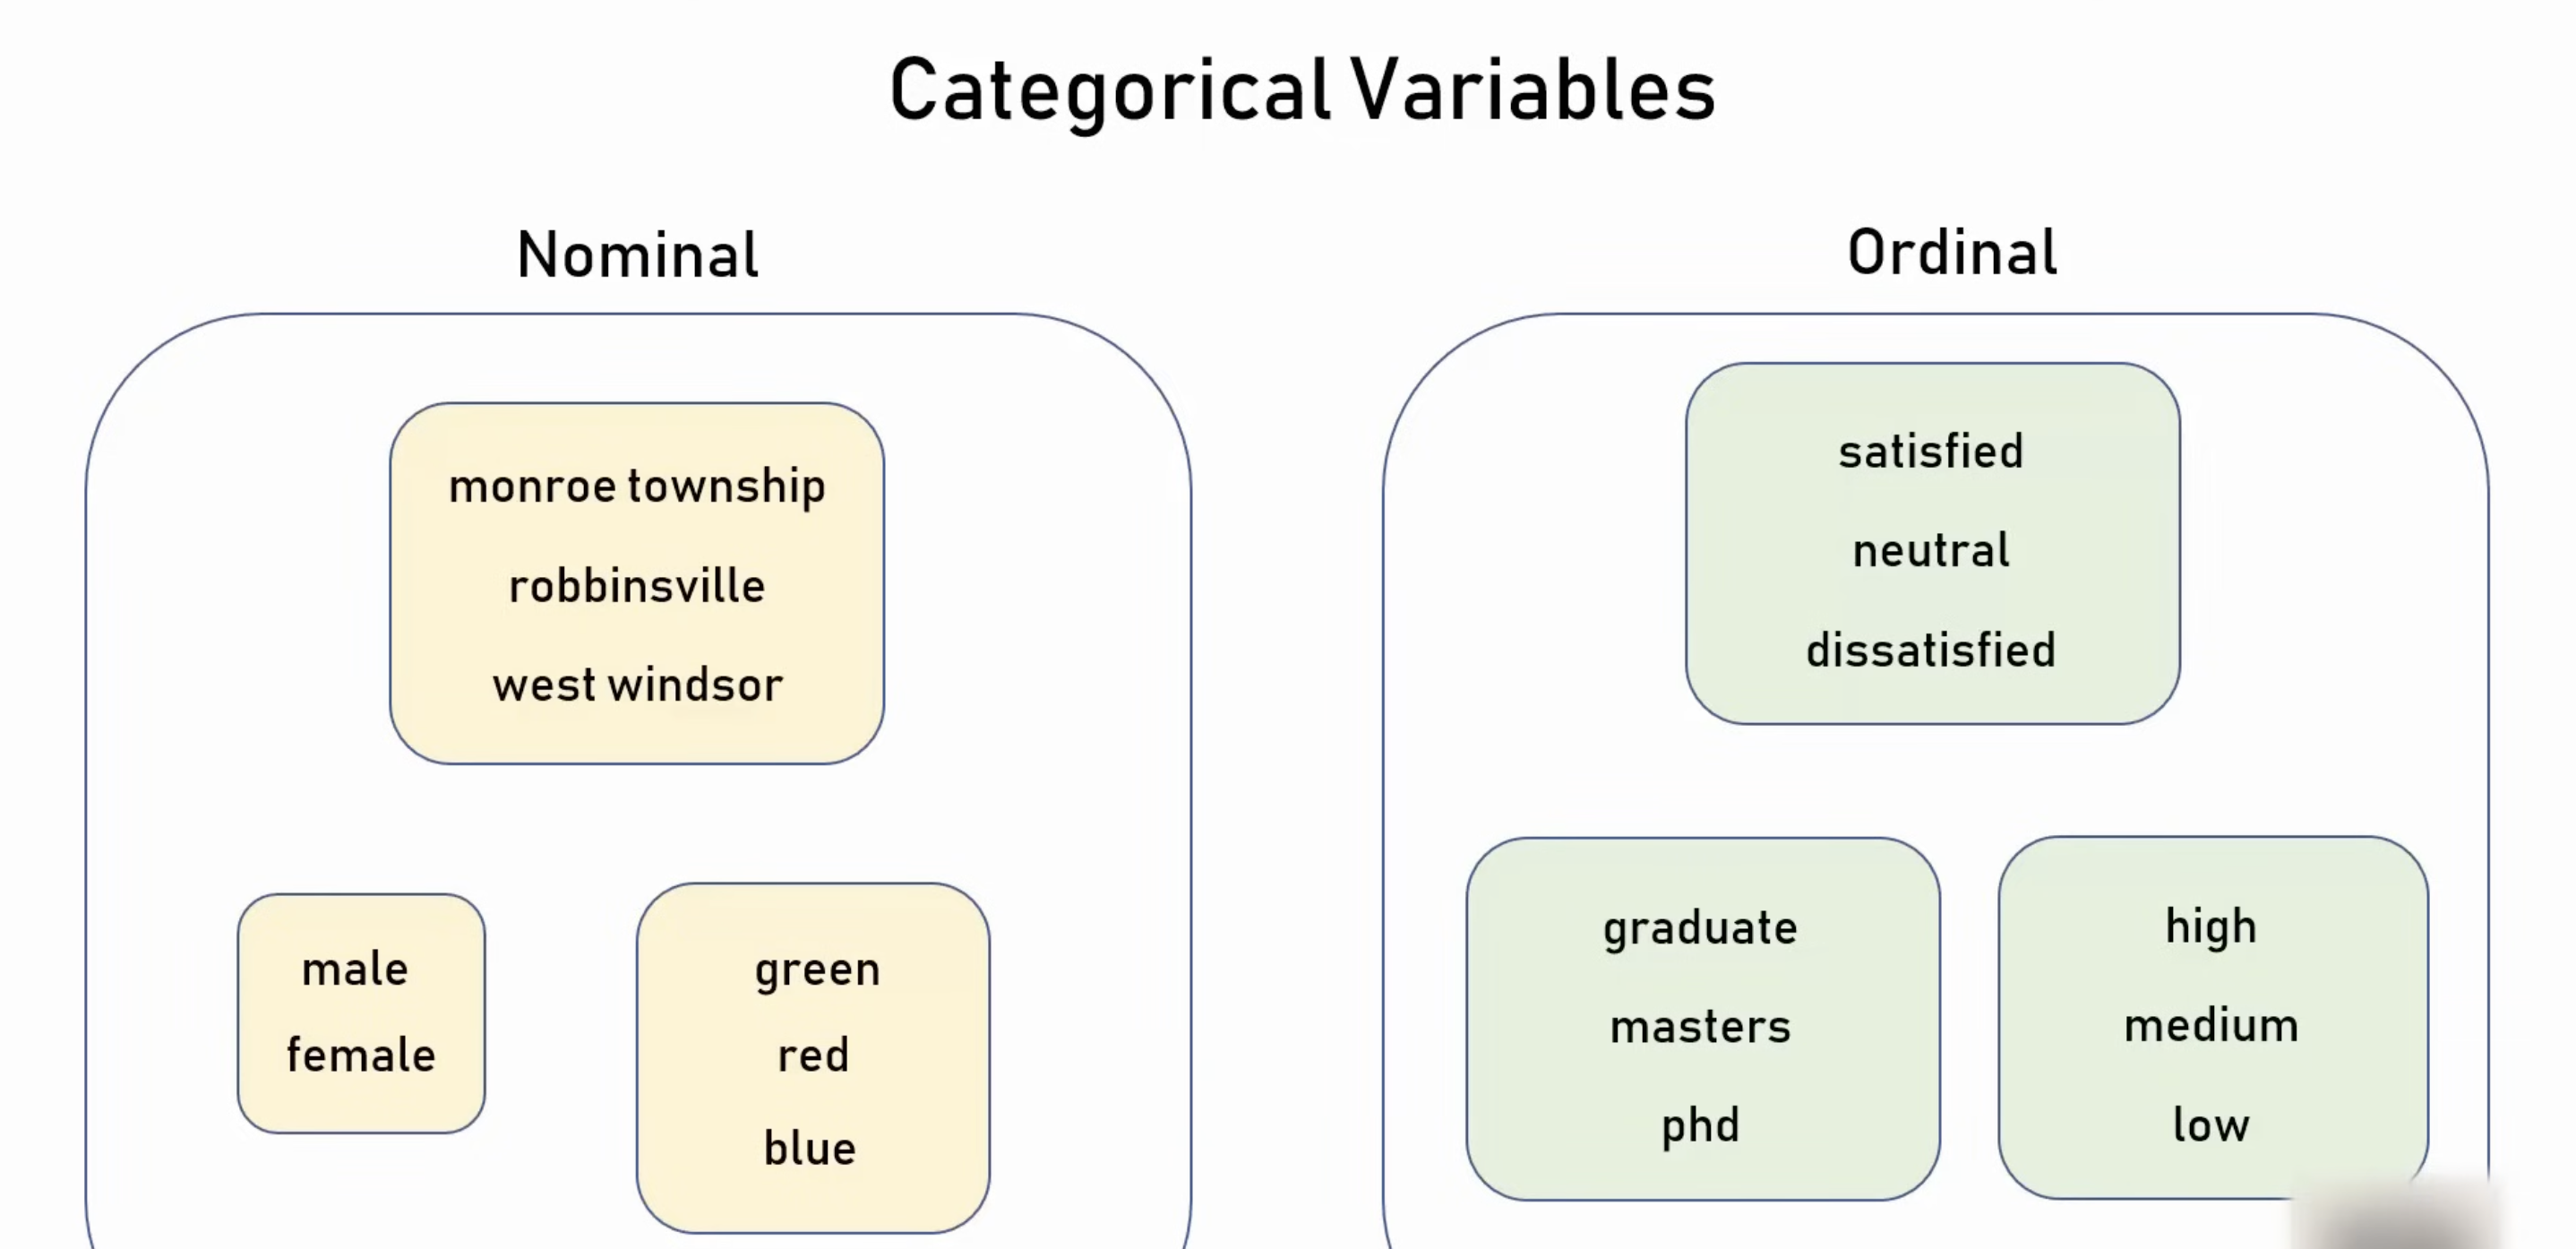

To counter the above problem, we use one hot encoding. We create columns for each categories and assign binary values, and the extra variables that are created are called dummy variables.

To create this new dataframe, we will use the `get_dummies` function in pandas.

In [ ]:
# creating dummy variables
dummies = pd.get_dummies(df['town'])

# concatinating both dataframes
merged = pd.concat([df, dummies], axis = 1)
merged

Now we have to do two things:
1. remove the `town` column as it is not needed and regression can't deal with textual data.
2. we have to drop one of the dummy variables because if we keep all three then they will become linearly dependent and multicollinear, which is the high correlation among independent variables in a regression model. This means that one or more dummy variables can be linearly predicted from the others, making it impossible for the model to separate their individual effects.

In [ ]:
final = merged.drop(['town', 'west windsor'], axis = 'columns')
final

In [ ]:
# creating a linear regression model
reg = linMod.LinearRegression()
reg.fit(final[['area', 'monroe township', 'robinsville']].values, final[['price']])

In [ ]:
# predicting the price
print(reg.predict([[2800, 0, 1]]))
print(reg.predict([[3400, 0, 0]]))

In [ ]:
# defining the performance of the model using the .score method
reg.score(final[['area', 'monroe township', 'robinsville']].values, final[['price']])

Now we will do something similar using one hot encoding present in the `sklearn` library

In [39]:
# using sklearn library
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In order to use one hot encoder, we will have to perform label encoding on the `town` column.

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# dfle = df
# dfle['town'] = le.fit_transform(dfle['town'])

In [54]:
# now we will create the one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['town']])
final_dataframe = pd.concat([df, ohetransform], axis=1)
final_dataframe = final_dataframe.drop(['town', 'town_monroe township'], axis=1)

# final dataframe created with one hot encoding
final_dataframe

,area,price,town_robinsville,town_west windsor
0,2600,550000,0.0,0.0
1,3000,565000,0.0,0.0
2,3200,610000,0.0,0.0
3,3600,680000,0.0,0.0
4,4000,725000,0.0,0.0
5,2600,585000,0.0,1.0
6,2800,615000,0.0,1.0
7,3300,650000,0.0,1.0
8,3600,710000,0.0,1.0
9,2600,575000,1.0,0.0


In [58]:
# training regression model
reg = linMod.LinearRegression()
X = final_dataframe.drop('price', axis=1)
reg.fit(X.values, final_dataframe['price'].values)


,area,town_robinsville,town_west windsor
0,2600,0.0,0.0
1,3000,0.0,0.0
2,3200,0.0,0.0
3,3600,0.0,0.0
4,4000,0.0,0.0
5,2600,0.0,1.0
6,2800,0.0,1.0
7,3300,0.0,1.0
8,3600,0.0,1.0
9,2600,1.0,0.0


In [61]:
# predicting
print(reg.predict([[2800, 1, 0]]))
print(reg.predict([[3400, 0, 1]]))

[590775.63964739]
[681241.6684584]
